In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas  as pd
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [4]:
df.drop('id' , axis =  1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


Preprocessing:

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stop words
stopwords = stopwords.words('english')

def process_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Remove single alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing digits
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    # Remove stop words and lemmatize the words
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens if word not in stopwords]
    return ' '.join(tokens)

df['tokens'] = df['comment_text'].apply(process_text)

In [6]:
print(df['tokens'])

0         explanation edit make username hardcore metall...
1         daww match background colour im seemingly stic...
2         hey man im really try edit war guy constantly ...
3         cant make real suggestions improvement wonder ...
4                       sir hero chance remember page thats
                                ...                        
159566    second time ask view completely contradict cov...
159567                 ashamed horrible thing put talk page
159568    spitzer umm theres actual article prostitution...
159569    look like actually put speedy first version de...
159570    really dont think understand come idea bad rig...
Name: tokens, Length: 159571, dtype: object


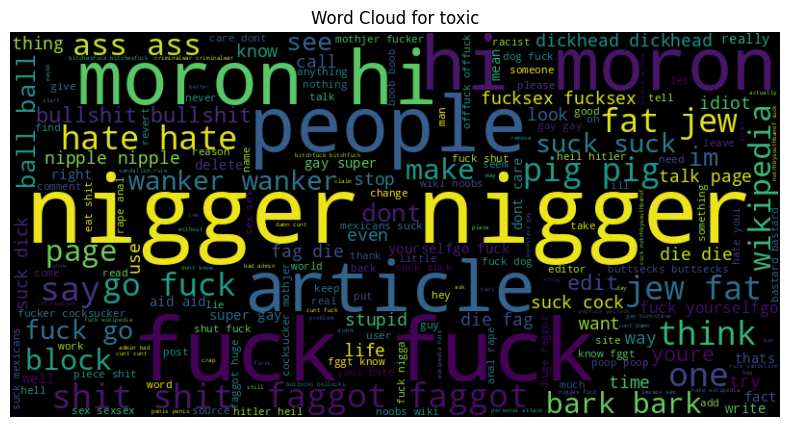

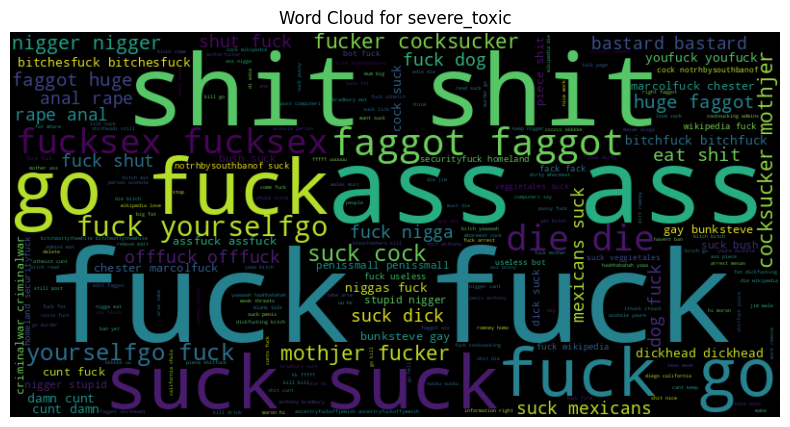

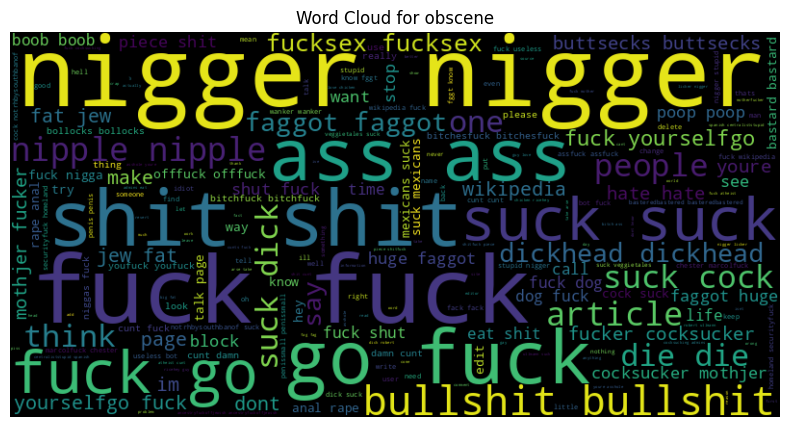

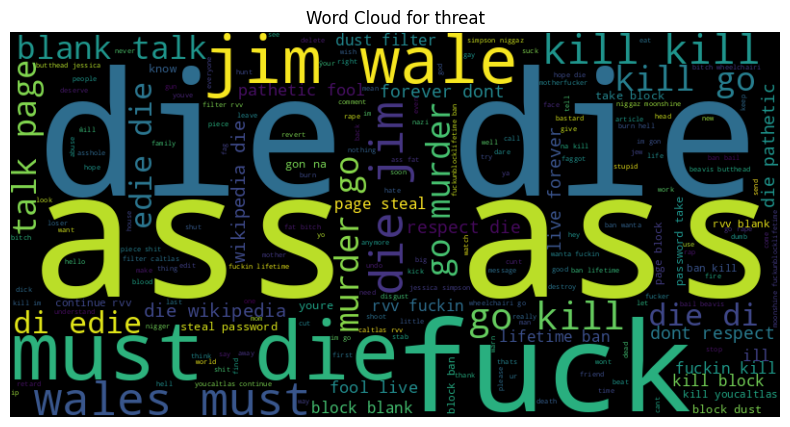

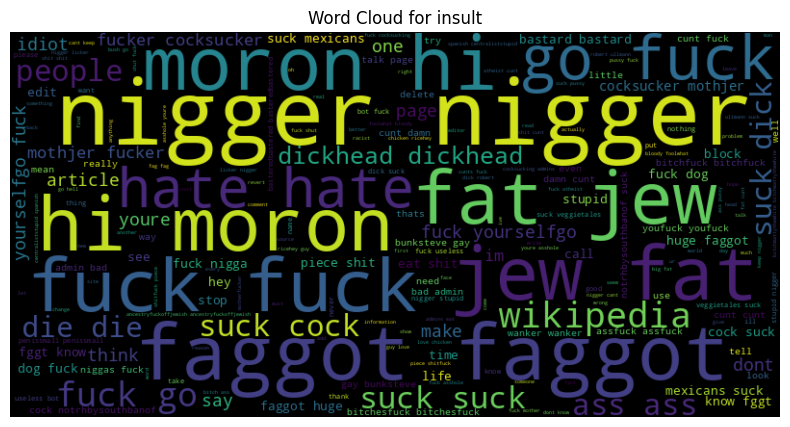

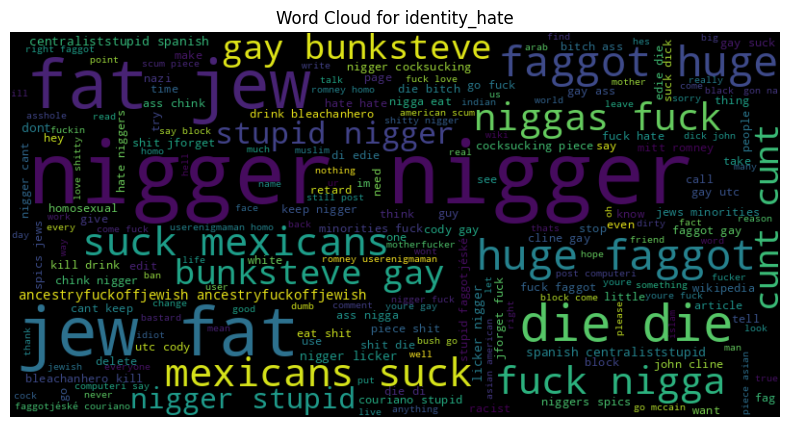

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of columns to generate word clouds for
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for column in columns:
    df_1 = df[df[column] == 1] # Using text with "True" values.
    text = ' '.join(df_1['tokens'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black')

    # Generate a word cloud
    wordcloud.generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column}')
    plt.axis("off")
    plt.show()


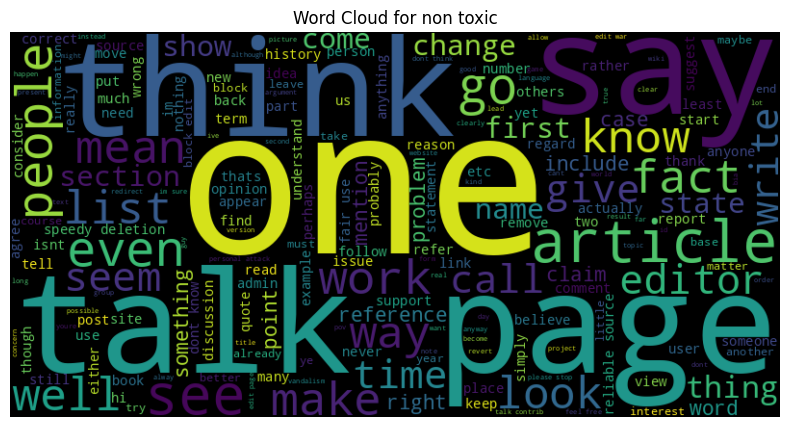

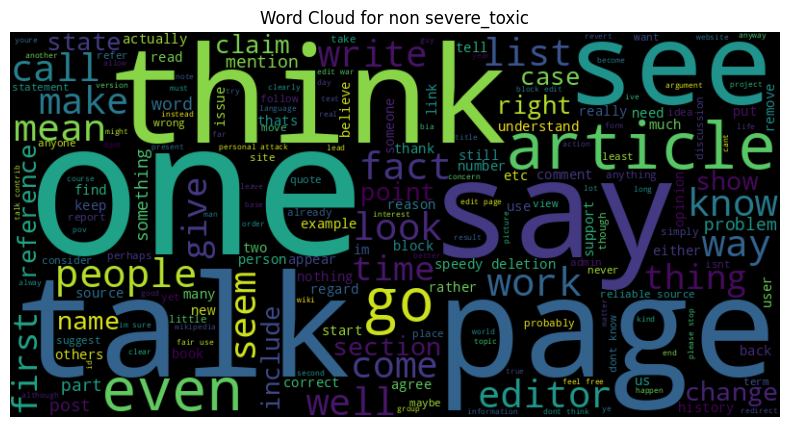

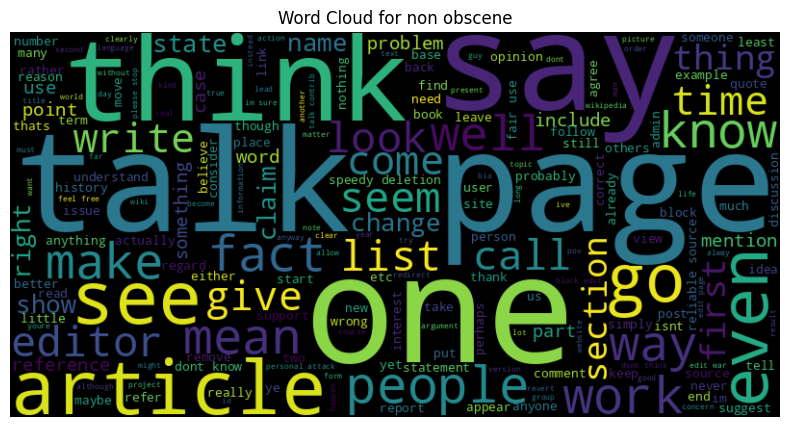

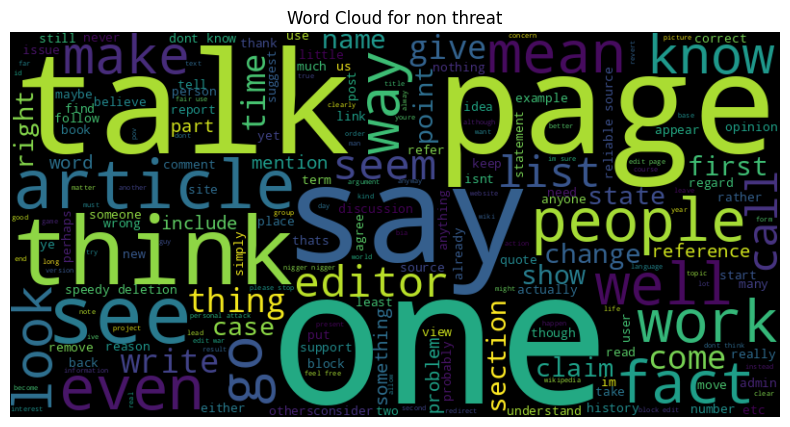

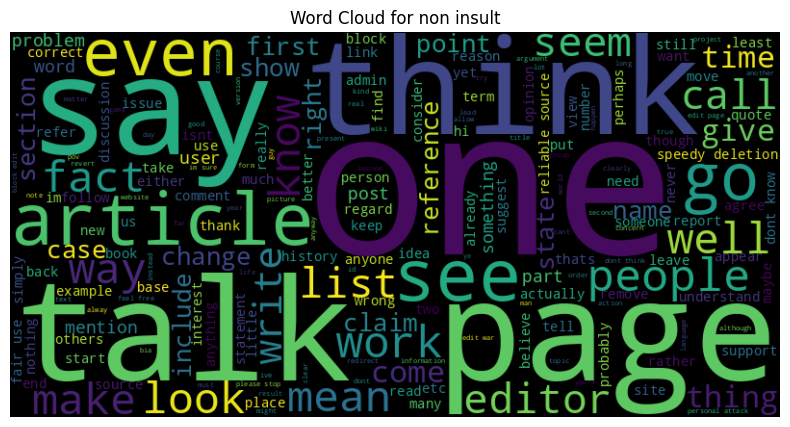

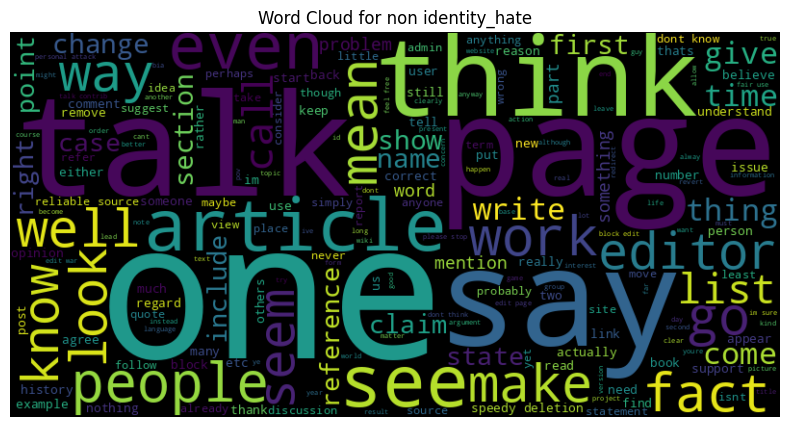

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of columns to generate word clouds for
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for column in columns:
    df_1 = df[df[column] == 0]  #Using text with "False" values
    text = ' '.join(df_1['tokens'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black')

    # Generate a word cloud
    wordcloud.generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for non {column}')
    plt.axis("off")
    plt.show()

In [9]:
X = df['tokens']
y = df.iloc[: , [1]]
y = y.to_numpy()
y_ = df.iloc[: , 1:7]

print( y_.iloc[:])
y_ = y_.to_numpy()

print(X.values)

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]
['explanation edit make username hardcore metallica fan revert werent vandalisms closure gas vote new york dolls fac please dont remove template talk page si

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

text_data = X.values
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_matrix   = tfidf_vectorizer.fit_transform(text_data)

x_train, x_test,y_train, y_test = train_test_split(tfidf_matrix , y ,test_size =0.2 , random_state =42)


Define Model 1:Multinomial Niave Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

Results:

In [12]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9185649381168729


In [13]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {matrix}')


Confusion Matrix:
 [[28847    12]
 [ 2587   469]]


In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n {report}')


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     28859
           1       0.98      0.15      0.27      3056

    accuracy                           0.92     31915
   macro avg       0.95      0.58      0.61     31915
weighted avg       0.92      0.92      0.89     31915



Using LSTM


In [14]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils import to_categorical
from keras.layers import SpatialDropout1D

In [15]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM  = 32

tokenizer = Tokenizer(num_words = MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True )
tokenizer.fit_on_texts(text_data)
word_index = tokenizer.word_index
print(len(word_index))

206702


In [16]:
sequences = tokenizer.texts_to_sequences(text_data)
data = pad_sequences(sequences ,maxlen= MAX_SEQUENCE_LENGTH)
print(data.shape)

(159571, 150)


In [28]:
x_train, x_test,y_train, y_test = train_test_split(data, y_ ,test_size =0.2 , random_state =42)

In [19]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout, BatchNormalization

In [51]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(Bidirectional(LSTM(32, activation="tanh")))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          1600000   
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 6)                 774       
                                                      

In [25]:
print("Shape of data:", data.shape)
print("Shape of labels:", y_.shape)


Shape of data: (159571, 150)
Shape of labels: (159571, 6)


In [52]:
from keras.callbacks import EarlyStopping

epochs = 3
batch_size = 128

callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

# Print input data shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    )

x_train shape: (127656, 150)
y_train shape: (127656, 6)
Epoch 1/3
798/798 [==============================] - 62s 70ms/step - loss: 0.0853 - accuracy: 0.9737 - val_loss: 0.0536 - val_accuracy: 0.9943
Epoch 2/3
798/798 [==============================] - 23s 29ms/step - loss: 0.0469 - accuracy: 0.9941 - val_loss: 0.0529 - val_accuracy: 0.9943
Epoch 3/3
798/798 [==============================] - 20s 25ms/step - loss: 0.0412 - accuracy: 0.9940 - val_loss: 0.0555 - val_accuracy: 0.9943


In [54]:
# Generate predictions
predictions = model.predict(x_test)
# Apply threshold
threshold = 0.5
predictions = np.where(predictions > threshold, 1, 0)

998/998 [==============================] - 6s 5ms/step


In [55]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(f'Classification Report:\n {report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      3056
           1       0.59      0.09      0.16       321
           2       0.83      0.76      0.79      1715
           3       0.00      0.00      0.00        74
           4       0.72      0.64      0.68      1614
           5       0.00      0.00      0.00       294

   micro avg       0.80      0.65      0.72      7074
   macro avg       0.50      0.37      0.40      7074
weighted avg       0.75      0.65      0.69      7074
 samples avg       0.06      0.06      0.06      7074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accurary for predicting each column.

In [56]:
for i in range(len(columns)):
  accuracy = accuracy_score(y_test[: , [i]], predictions[: , [i]])
  print(f'Test accuracy: {columns[i]}', accuracy)


Test accuracy: toxic 0.9603947986840043
Test accuracy: severe_toxic 0.990224032586558
Test accuracy: obscene 0.9786307378975403
Test accuracy: threat 0.9976813410621964
Test accuracy: insult 0.9695441015196616
Test accuracy: identity_hate 0.9907880307065643


Accurary considering all columns for a given text.

In [57]:
from sklearn.metrics import accuracy_score
# Compute accuracy
accuracy = accuracy_score(y_test, predictions)
print('Test accuracy:', accuracy)


Test accuracy: 0.9167162776124079


In [61]:
for i in range(0,2):
  user_text = input("Enter text to classify: ")
  user_text = process_text(user_text)
  user_sequences = tokenizer.texts_to_sequences([user_text])  # Convert input text to a list containing a single sequence
  user_data = pad_sequences(user_sequences, maxlen=MAX_SEQUENCE_LENGTH)

  # Make predictions using the model
  user_predictions = model.predict(user_data).ravel()>0.5

  columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

  # Print classification scores for each class
  print("Classification scores for each class:")
  for i in range(len(columns)):
    print(f'{columns[i]} : {user_predictions[i]}')


Enter text to classify: you are like shit man
1/1 [==============================] - 0s 23ms/step
Classification scores for each class:
toxic : True
severe_toxic : False
obscene : True
threat : False
insult : True
identity_hate : False
Enter text to classify: happy to see you!
1/1 [==============================] - 0s 20ms/step
Classification scores for each class:
toxic : False
severe_toxic : False
obscene : False
threat : False
insult : False
identity_hate : False
